# MNIST - Categorical Classification

> ## Overfitting Issue

## Import TensorFlow

In [2]:
import warnings
warnings.filterwarnings('ignore')

- import TensorFlow

In [3]:
import tensorflow as tf

tf.__version__

'2.11.0'

- GPU 설정 확인

In [4]:
tf.test.gpu_device_name()

'/device:GPU:0'

- GPU 종류 확인

In [5]:
!nvidia-smi

Thu Mar 30 01:50:14 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P0    29W /  70W |    339MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# I. MNIST Data_Set Load & Review

> ## 1) Load MNIST Data_Set

In [6]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


- Train_Data Information

In [7]:
print(len(X_train))
print(X_train.shape)
print()
print(len(y_train))
print(y_train[0:5])

60000
(60000, 28, 28)

60000
[5 0 4 1 9]


- Test_Data Information

In [8]:
print(len(X_test))
print(X_test.shape)
print()
print(len(y_test))
print(y_test[0:5])

10000
(10000, 28, 28)

10000
[7 2 1 0 4]


> ## 2) Visualization

- matplotlib

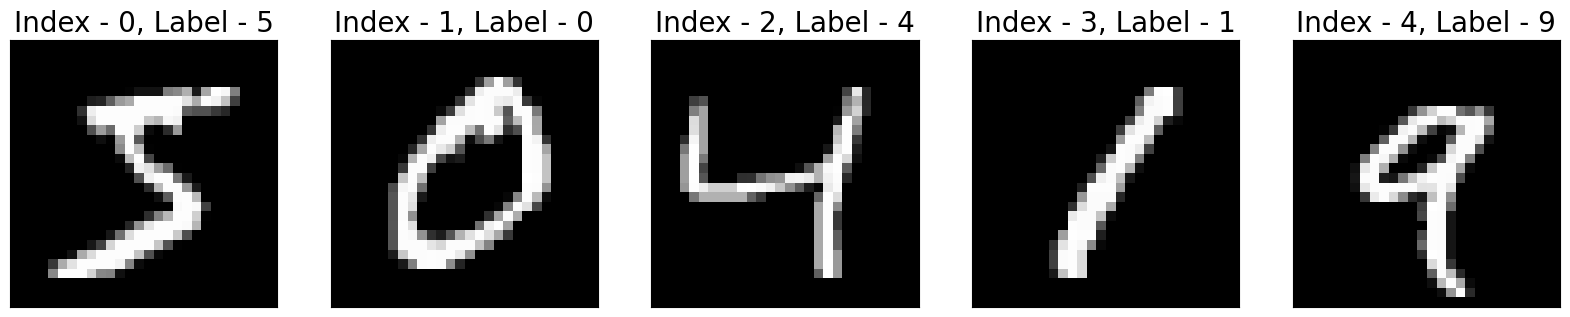

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 4))
for idx in range(5):
    label = y_train[idx]
    plt.subplot(1, 5, idx + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[idx], cmap = 'gray')
    plt.title('Index - %d, Label - %d' % (idx, label), fontsize = 20)
plt.show()

- NumPy Array

In [14]:
import numpy as np

np.set_printoptions(linewidth = 150, precision = 2)

print(X_train[4])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113  87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 189 210 252 252 25

# II. Data Preprocessing

> ## 1) Normalization

- 범위: 0 ~ 1

In [15]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [16]:
print(X_train[4])

[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]

> ## 2) Reshape

- (60000, 28, 28) to (60000, 784)

In [17]:
X_train = X_train.reshape((60000, 28 * 28))
X_test = X_test.reshape((10000, 28 * 28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

> ## 3) One Hot Encoding

In [18]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)



((60000, 10), (10000, 10))

In [19]:
print(y_train[:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


> ## 4) train_test_split( )

- #### Train(48,000) vs. validation(12,000)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                      test_size = 0.2,
                                                      random_state = 2045)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((48000, 784), (12000, 784), (48000, 10), (12000, 10))

# III. MNIST Keras Modeling

> ## 1) Model Define

- 모델 신경망 구조 정의
  - 2개의 Hidden Layers & 768개의 Nodes
  - 복잡한 Model Capacity로 인한 Overfitting

In [22]:
from tensorflow.keras import models, layers

mnist = models.Sequential()
mnist.add(layers.Dense(512, activation = 'relu', input_shape = (28 * 28,)))
mnist.add(layers.Dense(256, activation = 'relu'))
mnist.add(layers.Dense(10, activation = 'softmax'))

- 모델 구조 확인

In [23]:
mnist.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


> ## 2) Model Compile

- 모델 학습방법 설정

In [24]:
mnist.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

> ## 3) Model Fit

- 약 4분

In [25]:
%%time

Hist_mnist = mnist.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/100
375/375 [==============================] - 8s 6ms/step - loss: 0.2610 - accuracy: 0.9194 - val_loss: 0.1252 - val_accuracy: 0.9629
Epoch 2/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0944 - accuracy: 0.9707 - val_loss: 0.0961 - val_accuracy: 0.9707
Epoch 3/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0583 - accuracy: 0.9814 - val_loss: 0.0860 - val_accuracy: 0.9750
Epoch 4/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0401 - accuracy: 0.9868 - val_loss: 0.0907 - val_accuracy: 0.9764
Epoch 5/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0283 - accuracy: 0.9912 - val_loss: 0.0901 - val_accuracy: 0.9775
Epoch 6/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0212 - accuracy: 0.9932 - val_loss: 0.0893 - val_accuracy: 0.9757
Epoch 7/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0160 - accuracy: 0.9949 - val_loss: 0.0858 - val_accuracy: 0.9803

> ## 4) 학습 결과 시각화 - Overfitting

- Loss Visualization

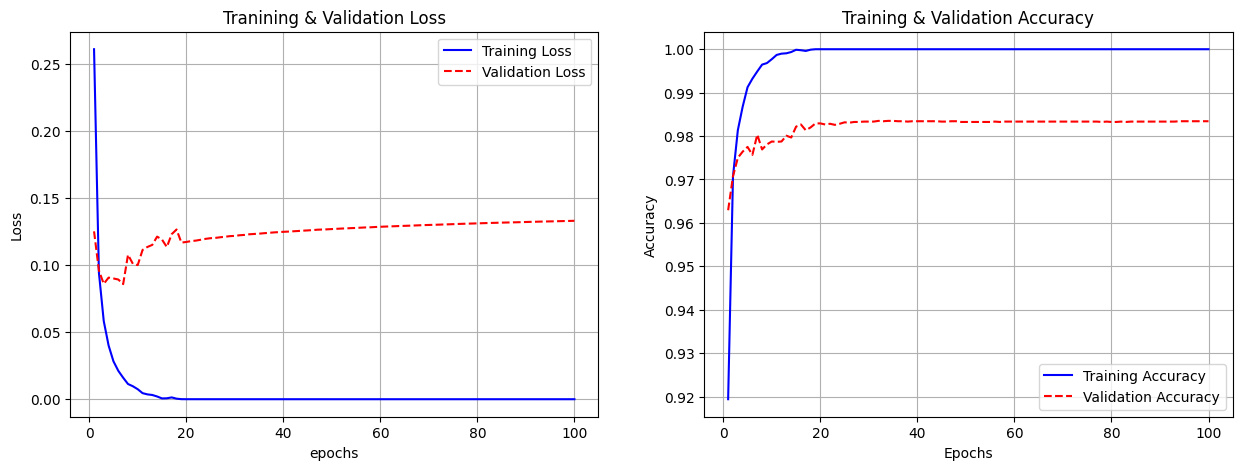

In [26]:
epochs = range(1, len(Hist_mnist.history['loss']) + 1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_mnist.history['loss'], 'b-')
plt.plot(epochs, Hist_mnist.history['val_loss'], 'r--')
plt.title('Tranining & Validation Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_mnist.history['accuracy'], 'b-')
plt.plot(epochs, Hist_mnist.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

> ## 5) Model Evaluate

- Loss & Accuracy

In [27]:
loss, accuracy = mnist.evaluate(X_test, y_test, verbose = 0)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Loss = 0.10260
Accuracy = 0.98370


> ## 6) Model Predict

- Probability

In [31]:
np.set_printoptions(suppress = True, precision = 9)

print(mnist.predict(X_test[:1, :], verbose = 0))

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


- class

In [32]:
print(np.argmax(mnist.predict(X_test[:1, :], verbose = 0)))

7


> ## 7) Image Visualization

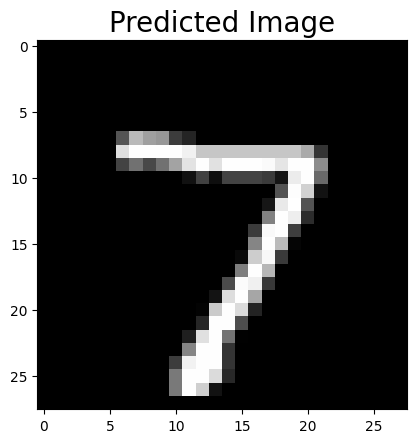

In [33]:
plt.imshow(X_test[0].reshape(28, 28), cmap = 'gray')
plt.title('Predicted Image', fontsize = 20)
plt.show()

> ## 8) Confusion Matrix

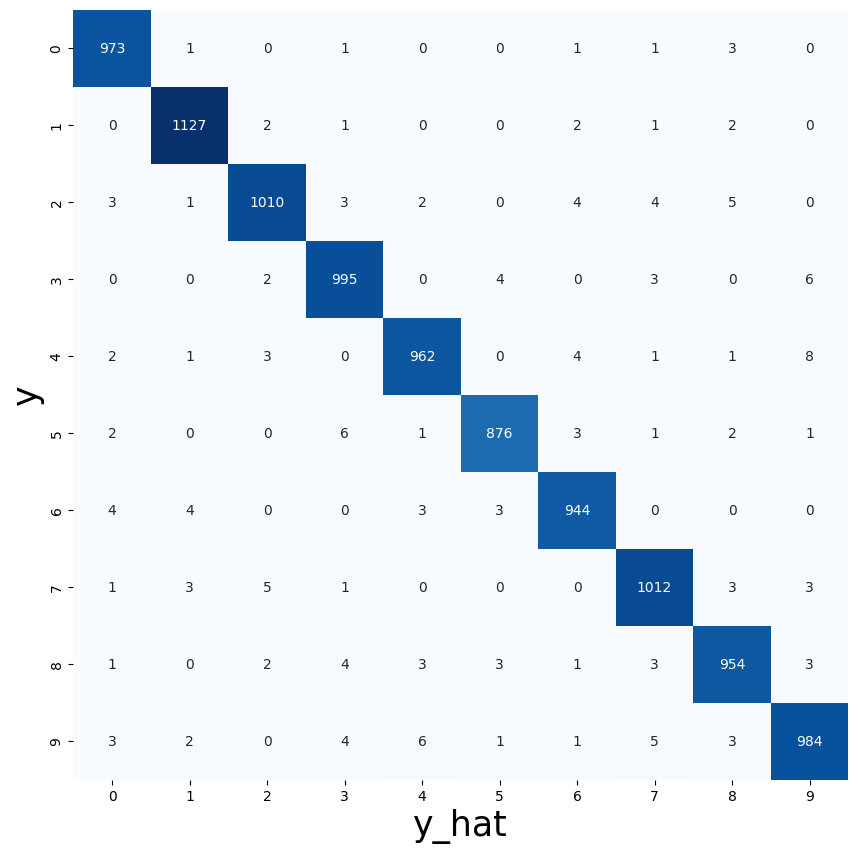

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

CM = confusion_matrix(np.argmax(y_test, axis = 1),
                      np.argmax(mnist.predict(X_test, verbose = 0), axis = 1))

plt.figure(figsize = (10, 10))
sns.heatmap(CM,
            annot = True,
            fmt = 'd',
            cmap = 'Blues',
            cbar = False)
plt.xlabel('y_hat', fontsize = 25)
plt.ylabel('y', fontsize = 25)
plt.show()

> ## 9) Classification Report

In [39]:
from sklearn.metrics import classification_report

print('wn',
      classification_report(np.argmax(y_test, axis = 1),
                            np.argmax(mnist.predict(X_test, verbose = 0), axis = 1)))

wn               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

